In [2]:
import sys

sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain")
sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain\\source")

In [3]:
import h5py 
from source.data_processing.image_reading import read_image, downscale_image
import cv2
import numpy as np
import torch
from source.visualization.image_visualization import plot_images_with_matches_via_mapping
from source.data_processing.cropping import create_crop_coordinate_mapping, crop_image

In [4]:
file_path = r"C:\Users\robin\Desktop\temp\temp\0524-0525_deformation_low_scale.h5"
f1 = h5py.File(file_path, 'r')
deformation_10th = cv2.resize(np.array(f1["deformation"])//10, (3463, 8000))
deformation_10th = torch.Tensor(deformation_10th)
deformation_10th.shape

torch.Size([8000, 3463, 2])

In [5]:
deformation_10th[:, :, 0].max(), deformation_10th[:, :, 1].max()  # Need to swap x and y

(tensor(7779.8750), tensor(3658.7656))

In [6]:
deformation_10th = torch.flip(deformation_10th, dims=[-1])
deformation_10th[:, :, 0].max()  # Need to swap x and y

tensor(3658.7656)

In [7]:
from torchvision.transforms import ToTensor
import torch
img1_10th = read_image(r"C:\Users\robin\Desktop\temp\temp\B20_0524_Slice15.tif", size=(3463, 8000))
img2_10th = read_image(r"C:\Users\robin\Desktop\temp\temp\B20_0525_Slice15.tif", size=(3668, 7382))
img1_10th = ToTensor()(img1_10th)
img2_10th = ToTensor()(img2_10th)

In [8]:
img1_10th_adjusted = torch.concatenate((img1_10th, torch.zeros(1, 8000, 205)), dim=2)
deformation_10th_adjusted = torch.concatenate((torch.Tensor(deformation_10th), torch.ones( 8000, 205, 2)*-1), dim=1)
img2_10th_adjusted = torch.concatenate((img2_10th, torch.zeros(1, 618, 3668)), dim=1)

In [9]:
img1_10th_adjusted.shape, img2_10th_adjusted.shape, deformation_10th_adjusted.shape

(torch.Size([1, 8000, 3668]),
 torch.Size([1, 8000, 3668]),
 torch.Size([8000, 3668, 2]))

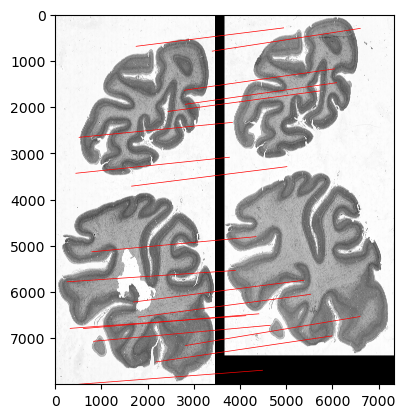

In [10]:
plot_images_with_matches_via_mapping(img1_10th_adjusted, img2_10th_adjusted, 
                                     deformation_10th_adjusted, 
                                     number_of_matches=20, 
                                     sample_keypoints_randomly=True)

In [11]:
crop_position_image_1 = [1500, 4000]
crop_position_image_2 = deformation_10th[crop_position_image_1[1], crop_position_image_1[0]].long()

In [12]:
crop_coordinate_mapping = create_crop_coordinate_mapping(deformation_10th, crop_position_image_1, crop_position_image_2, crop_size=640)

In [13]:
crop_1 = crop_image(img1_10th, crop_position_image_1, crop_size=640)
crop_2 = crop_image(img2_10th, crop_position_image_2, crop_size=640)

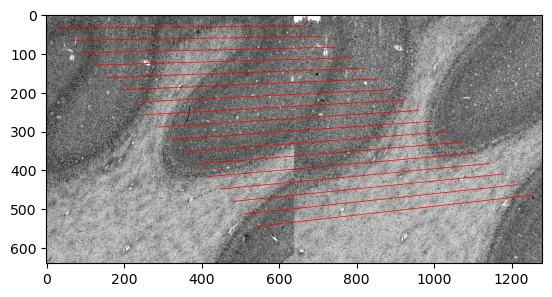

In [14]:
plot_images_with_matches_via_mapping(crop_1, crop_2, crop_coordinate_mapping, number_of_matches=20)